# 3. DSA 데이터를 이용한 AE 응용 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('C:\\Users\\akasa\\Downloads\\DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [4]:
df.isnull().value_counts()

T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  T_yacc_std  T_yacc_skew  T_zacc_mean  T_zacc_max  T_zacc_min  T_zacc_var  T_zacc_std  T_zacc_skew  T_xgyro_mean  T_xgyro_max  T_xgyro_min  T_xgyro_var  T_xgyro_std  T_xgyro_skew  T_ygyro_mean  T_ygyro_max  T_ygyro_min  T_ygyro_var  T_ygyro_std  T_ygyro_skew  T_zgyro_mean  T_zgyro_max  T_zgyro_min  T_zgyro_var  T_zgyro_std  T_zgyro_skew  T_xmag_mean  T_xmag_max  T_xmag_min  T_xmag_var  T_xmag_std  T_xmag_skew  T_ymag_mean  T_ymag_max  T_ymag_min  T_ymag_var  T_ymag_std  T_ymag_skew  T_zmag_mean  T_zmag_max  T_zmag_min  T_zmag_var  T_zmag_std  T_zmag_skew  RA_xacc_mean  RA_xacc_max  RA_xacc_min  RA_xacc_var  RA_xacc_std  RA_xacc_skew  RA_yacc_mean  RA_yacc_max  RA_yacc_min  RA_yacc_var  RA_yacc_std  RA_yacc_skew  RA_zacc_mean  RA_zacc_max  RA_zacc_min  RA_zacc_var  RA_zacc_std  RA_zacc_skew  RA_xgyro_mean  RA_xgyro_max  RA_xgyro_min  RA_xgyro_var  RA_xgyro_std  RA_xg

In [5]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [6]:
normal = df[df['activity'] == 'lyingRigh']
abnormal = df[df['activity'] == 'lyingBack']
print(normal.shape)
print(abnormal.shape)

(480, 272)
(480, 272)


In [7]:
Labels = ['Normal','Abnormal']

In [8]:
normal

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
1440,2.249583,2.3365,2.1425,0.001512,0.038879,-0.193941,-7.764958,-7.6437,-7.8585,0.002175,...,0.001769,-0.007003,-0.382133,-0.37700,-0.38614,5.389866e-06,0.002322,0.362565,lyingRigh,p1
1441,2.244790,2.4558,2.1420,0.003337,0.057765,0.810598,-7.803353,-7.6884,-7.9100,0.001881,...,0.000700,-0.205127,-0.381660,-0.38010,-0.38367,6.013652e-07,0.000775,0.072462,lyingRigh,p1
1442,2.367303,2.5594,2.1427,0.010614,0.103026,-0.206209,-7.774716,-7.6005,-7.9414,0.004948,...,0.000767,-0.098046,-0.381889,-0.37905,-0.38380,8.370564e-07,0.000915,0.309204,lyingRigh,p1
1443,2.287133,2.4254,2.1574,0.001966,0.044339,0.347250,-7.752818,-7.6438,-7.8821,0.002483,...,0.001562,0.162062,-0.383061,-0.37955,-0.38655,3.050788e-06,0.001747,0.079417,lyingRigh,p1
1444,2.296790,2.4180,2.2021,0.001212,0.034821,0.287422,-7.776321,-7.6145,-7.8665,0.001677,...,0.000927,-0.322743,-0.379587,-0.37776,-0.38173,6.320184e-07,0.000795,0.002311,lyingRigh,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.4207,0.000242,...,0.009589,0.401254,-0.410987,-0.38221,-0.44605,9.935077e-05,0.009967,-0.597598,lyingRigh,p8
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.4356,0.000156,...,0.008588,0.147180,-0.411248,-0.36581,-0.43676,8.659481e-05,0.009306,1.021454,lyingRigh,p8
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.4313,0.000214,...,0.005814,0.032341,-0.409787,-0.37926,-0.43431,7.258946e-05,0.008520,0.431012,lyingRigh,p8
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.4539,0.000257,...,0.009510,0.409508,-0.409101,-0.36074,-0.44087,1.127801e-04,0.010620,1.368666,lyingRigh,p8


In [9]:
# people 열의 고유값과 그 빈도수 확인
normal['people'].value_counts()

people
p1    60
p2    60
p3    60
p4    60
p5    60
p6    60
p7    60
p8    60
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import pandas as pd

def scailing(data):
    # Separate 'people' and 'activity' columns
    peoples = data['people']
    target = data['activity']
    data = data.drop(['people', 'activity'], axis=1)
    
    # Initialize encoders and scaler
    ss = StandardScaler()
    one_hot_people = OneHotEncoder(sparse_output=False)
    
    # Apply scaling
    data_encoded = ss.fit_transform(data)
    
    # One-Hot Encoding for 'people' and 'activity'
    people_encoded = one_hot_people.fit_transform(peoples.values.reshape(-1, 1))
    #people_mapping = {'p1': 0, 'p2': 1,'p3': 2,'p4': 3,'p5': 4,'p6': 5,'p7': 6,'p8': 7}
    #people_encoded = peoples.map(people_mapping)

    target_mapping = {'lyingRigh': 1, 'lyingBack': 0}
    target_encoded = target.map(target_mapping)
    
    # Convert to DataFrame
    data_encoded_df = pd.DataFrame(data_encoded, columns=data.columns)
    people_encoded_df = pd.DataFrame(people_encoded, columns=one_hot_people.get_feature_names_out(['people']))
    #people_encoded_df = pd.DataFrame(people_encoded, columns=['people'])
    target_encoded_df = pd.DataFrame(target_encoded, columns=['activity'])
    
    # Merge DataFrames
    data_scaled = pd.concat([data_encoded_df, people_encoded_df], axis=1)
    #data_scaled = data
    #data_scaled['people'] = people_encoded_df.reset_index(drop=True)
    data_scaled['activity'] = target_encoded_df.reset_index(drop=True)
    
    return data_scaled

# Final result
normal_scaled = scailing(normal)
abnormal_scaled = scailing(abnormal)

print(normal_scaled)
print(abnormal_scaled)


     T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  T_xacc_skew  \
0       0.604047    0.604576    0.592347   -0.004018    0.404491    -0.436675   
1       0.601807    0.659909    0.592112    0.192657    1.074963     2.144409   
2       0.659080    0.707960    0.592441    0.976842    2.681782    -0.468196   
3       0.621601    0.645809    0.599348    0.044936    0.598301     0.953872   
4       0.626116    0.642377    0.620350   -0.036248    0.260412     0.800149   
..           ...         ...         ...         ...         ...          ...   
475     0.777447    0.754248    0.802178   -0.145439   -0.474759     0.443076   
476     0.774138    0.753320    0.798607   -0.144596   -0.465009     1.009105   
477     0.774758    0.753506    0.791043   -0.139254   -0.407128     0.041110   
478     0.777291    0.754109    0.797010   -0.143644   -0.454227    -0.233596   
479     0.775139    0.763385    0.794802   -0.133486   -0.350620     1.624862   

     T_yacc_mean  T_yacc_ma

In [12]:
#data 분리
from sklearn.model_selection import train_test_split

# 정상 데이터에서 train, val, test 분할 (이상치 데이터는 테스트에서만 사용)
train_data, temp_data = train_test_split(normal_scaled, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# 테스트 데이터에는 정상 데이터와 이상치 데이터를 모두 포함
test_data = pd.concat([test_data, abnormal_scaled])
test_target = test_data['activity']

# 테스트 데이터 셔플
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_target = test_target.sample(frac=1, random_state=42).reset_index(drop=True)

#AE는 비지도학습이므로 y 제거
test_data = test_data.drop(['activity'], axis=1)
train_data = train_data.drop(['activity'], axis=1)
val_data = val_data.drop(['activity'], axis=1)

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)
print(test_target.value_counts())

(336, 278)
(552, 278)
(72, 278)
activity
0    480
1     72
Name: count, dtype: int64


In [13]:
#AE 모델 생성 및 학습
# 오토인코더 모델
input_dim = train_data.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [14]:
history = autoencoder.fit(train_data, train_data, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_data =(val_data,val_data))

Epoch 1/50
2/2 [==============================] - 2s 624ms/step - loss: 1.1953 - val_loss: 1.5326
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 1.1927 - val_loss: 1.5309
Epoch 3/50
2/2 [==============================] - 0s 49ms/step - loss: 1.1903 - val_loss: 1.5293
Epoch 4/50
2/2 [==============================] - 0s 47ms/step - loss: 1.1882 - val_loss: 1.5276
Epoch 5/50
2/2 [==============================] - 0s 49ms/step - loss: 1.1862 - val_loss: 1.5257
Epoch 6/50
2/2 [==============================] - 0s 53ms/step - loss: 1.1841 - val_loss: 1.5238
Epoch 7/50
2/2 [==============================] - 0s 55ms/step - loss: 1.1819 - val_loss: 1.5218
Epoch 8/50
2/2 [==============================] - 0s 78ms/step - loss: 1.1795 - val_loss: 1.5196
Epoch 9/50
2/2 [==============================] - 0s 72ms/step - loss: 1.1771 - val_loss: 1.5170
Epoch 10/50
2/2 [==============================] - 0s 67ms/step - loss: 1.1741 - val_loss: 1.5141
Epoch 11/50
2/2 [===========

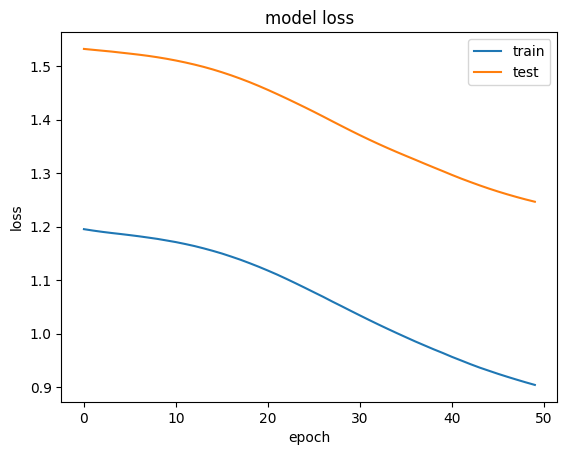

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [16]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': test_target})
error_df.describe()

18/18 [==============================] - 0s 3ms/step


,reconstruction_error,true_class
count,552.000000,552.000000
mean,1.000046,0.130435
std,3.705294,0.337087
min,0.293540,0.000000
25%,0.413694,0.000000
50%,0.480701,0.000000
75%,0.719480,0.000000
max,57.240768,1.000000


In [17]:
error_df.head()

,reconstruction_error,true_class
0,0.684537,0
1,0.427327,0
2,0.947391,0
3,0.347875,0
4,0.493261,0


In [18]:
threshold= 3

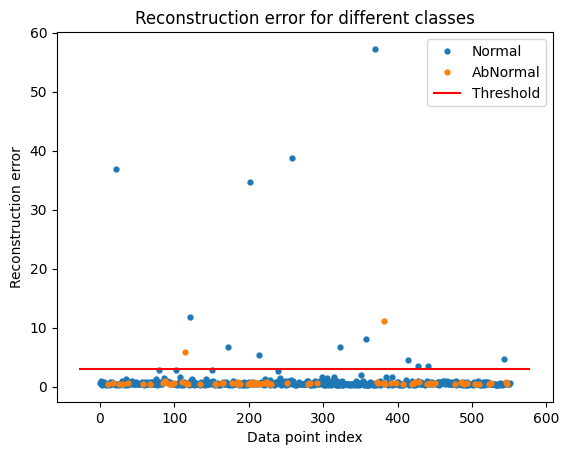

In [19]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "AbNormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

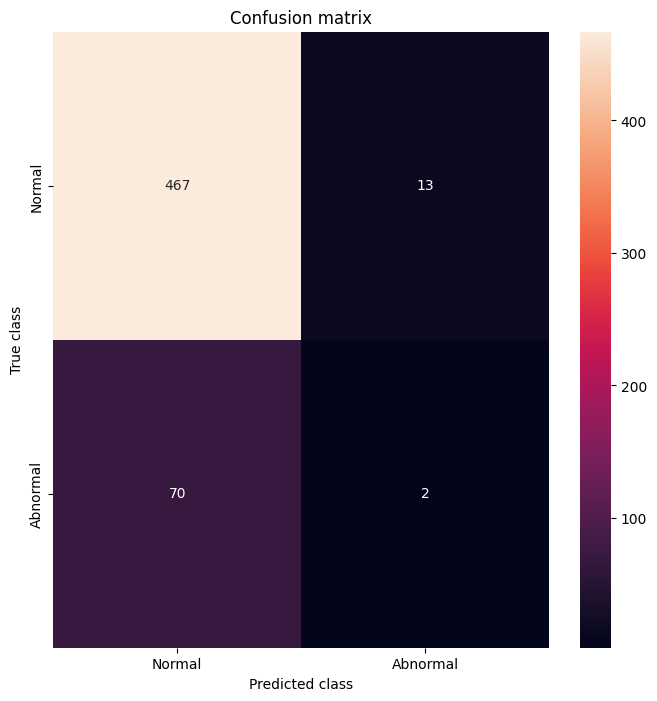

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       480
           1       0.13      0.03      0.05        72

    accuracy                           0.85       552
   macro avg       0.50      0.50      0.48       552
weighted avg       0.77      0.85      0.80       552



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [21]:
# 재구성 오류 계산
reconstruction_error = np.mean((test_data - autoencoder.predict(test_data))**2, axis=1)

# 재구성 오류가 임계값을 초과하면 이상치로 간주
y_pred = (reconstruction_error > threshold).astype(int)

from sklearn.metrics import accuracy_score

# test_target에는 실제 라벨(정상: 0, 이상치: 1)이 저장되어 있다고 가정
accuracy = accuracy_score(test_target, y_pred)

print(f"Accuracy: {accuracy:.4f}")


18/18 [==============================] - 0s 4ms/step
Accuracy: 0.8496
